## Assignment 2
### Question:For a rider whose age is above 45, men are less likely than woman to ride a bike. 
#### Null hypothesis:
The ratio of man above age 45 to man age 45 or below riding a bike is the same or greater than the ratio of woman above age 45 to woman age 45 or below riding a bike. 

#### Alternative hypothesis:
The ratio of man above age 45 to man age 45 or below riding a bike is smaller than the ratio of woman above age 45 to woman age 45 or below riding a bike. 

$\frac{W_{above45}}{W_{45orbelow}} <= \frac{M_{above45}}{M_{45orbelow}}$

$\frac{W_{above45}}{W_{45orbelow}} > \frac{M_{above45}}{M_{45orbelow}}$

I will use a significance level $\alpha=0.05$.


In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv ('PUI2016')
os.getenv ('PUIDATA')

'/home/cusp/ss9558/PUIdata'

In [3]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mkdir " + os.getenv("PUIDATA")) ##you have to make a new file directory first 
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA"))
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "/ -/ Citi/ Bike/ trip/ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
    os.system("rm " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

In [4]:
datestring = '201503'
getCitiBikeCSV(datestring)

file in place, you can continue


In [5]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + 
               datestring + '-citibike-tripdata.csv')

In [6]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1


In [7]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [8]:
df=df[df.usertype!='Customer']
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid','usertype','tripduration'], axis=1, inplace=True)
df.head()

,birth year,gender
0,1987.0,1
1,1968.0,1
3,1983.0,1
4,1970.0,1
5,1983.0,1


In [9]:
df_m_above45 = (df['birth year'][df['gender'] == 1]).groupby(df['birth year'] < 1971.0).count()
df_w_above45 = (df['birth year'][df['gender'] == 2]).groupby(df['birth year'] < 1971.0).count()
error_m = np.sqrt(df_m_above45)
error_w = np.sqrt(df_w_above45)

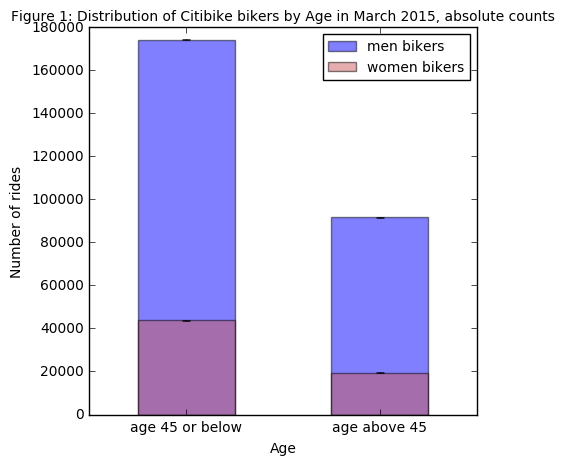

In [10]:
fig=pl.figure(figsize(5,5))
norm_w = 1
norm_m = 1
ax=((df_m_above45) / norm_m).plot(kind="bar", yerr=[
            ((error_m) / norm_m, (error_m) / norm_m)], alpha=0.5, rot=0, label='men bikers')

((df_w_above45) / norm_w).plot(kind="bar",  color='IndianRed', alpha=0.5, rot=0, yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')

ax.xaxis.set_ticklabels(['age 45 or below','age above 45'], fontsize=10)
ax.set_ylabel ("Number of rides", fontsize=10)
ax.set_xlabel ("Age", fontsize=10)
ax.set_title("Figure 1: Distribution of Citibike bikers by Age in March 2015, absolute counts",fontsize=10)
pl.legend(['men bikers','women bikers'], loc='best', fontsize=10)

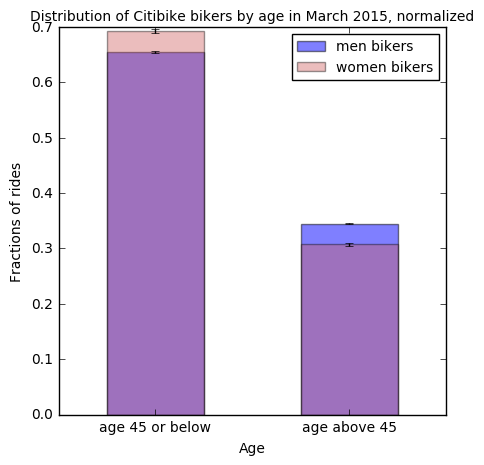

In [13]:
fig = pl.figure(figsize(5,5))
norm_m = df_m_above45.sum()
ax=((df_m_above45) / norm_m).plot(kind="bar", color='Blue', yerr=[
            ((error_m) / norm_m, (error_m) / norm_m)], alpha=0.5, rot=0, label='men bikers')
norm_w = df_w_above45.sum()

((df_w_above45) / norm_w).plot(kind="bar",  color='IndianRed', alpha=0.4, rot=0, yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')
ax.xaxis.set_ticklabels(['age 45 or below','age above 45'], fontsize=10)
ax.set_ylabel ("Fractions of rides", fontsize=10)
ax.set_xlabel ("Age", fontsize=10)
ax.set_title('Distribution of Citibike bikers by age in March 2015, normalized', fontsize=10)
pl.legend(['men bikers','women bikers'], loc='best', fontsize=10)

Men: above age 45:0.345, age 45 or below:0.655, above age 45 error:0.001, age 45 or below error:0.002
Women: above age 45:0.307, age 45 or below:0.693, above age 45 error:0.002, age 45 or below error:0.003


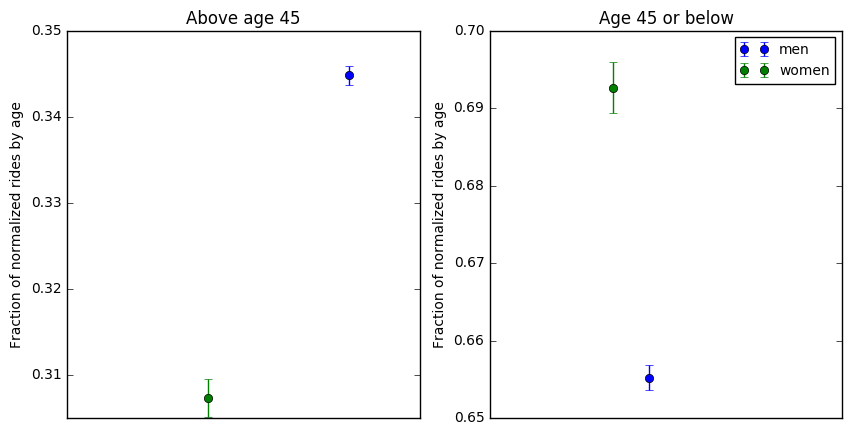

In [12]:
fig = pl.figure(figsize(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
m_above45 = sum(df_m_above45[1]) * 1.0 / norm_m
m_45orbelow = sum(df_m_above45[0]) * 1.0 / norm_m
eAbove45_m = np.sqrt(sum(error_m[1]**2)) / norm_m
e45orbelow_m = np.sqrt(sum(error_m[0]**2)) / norm_m

w_above45 = sum(df_w_above45[1]) * 1.0 / norm_w
w_45orbelow = sum(df_w_above45[0]) * 1.0 / norm_w
eAbove45_w = np.sqrt(sum(error_w[1]**2)) / norm_w
e45orbelow_w = np.sqrt(sum(error_w[0]**2)) / norm_w

print("Men: above age 45:{0:.3f}, age 45 or below:{1:.3f}, above age 45 error:{2:.3f}, age 45 or below error:{3:.3f}"\
      .format(m_above45, m_45orbelow, eAbove45_m, e45orbelow_m))
print("Women: above age 45:{0:.3f}, age 45 or below:{1:.3f}, above age 45 error:{2:.3f}, age 45 or below error:{3:.3f}"\
      .format(w_above45, w_45orbelow, eAbove45_w, e45orbelow_w))

ax1.errorbar([0.4], [m_above45], yerr=[eAbove45_m], fmt='o', label='men')
ax1.errorbar([0.2], [w_above45], yerr=[eAbove45_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [m_45orbelow], yerr=[e45orbelow_m], fmt='o', label='men')
ax2.errorbar([0.2], [w_45orbelow], yerr=[e45orbelow_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("Above age 45")
ax2.set_title("Age 45 or below")
ax2.set_ylabel("Fraction of normalized rides by age", fontsize = 10)
ax1.set_ylabel("Fraction of normalized rides by age", fontsize = 10)

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 10)

#### Figure 3: Fraction of Citibike bikers per gender in March 2015 for age above 45 (left) and age 45 or below (right)